In [1]:
import os

import numpy as np
import pandas as pd

import math
from natsort import natsorted

from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

from utils.utility_functions import categorical_cmap

from IPython.display import display, clear_output
from ipywidgets import interactive, widgets

In [2]:
def interactive_plot(clustering, elev, azim):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if clustering == 'Seg':
    
        print (f'{clustering} clustering')
        
        ax.scatter(
            data_dict[clustering][0]['Seg_emb1'],
            data_dict[clustering][0]['Seg_emb2'],
            data_dict[clustering][0]['Seg_emb3'],
            cmap=data_dict[clustering][1],
            c=data_dict[clustering][2],
            s=150000 / len(data_dict[clustering][0]),
            ec=['k' for i in data_dict[clustering][0][clustering]],
            linewidth=0.0
        )
        ax.view_init(elev=elev, azim=azim)
    
    elif clustering == 'VAE9_VIG7':
        
        print (f'{clustering} clustering')
        
        ax.scatter(
            data_dict[clustering][0]['VAE9_VIG7_emb1'],
            data_dict[clustering][0]['VAE9_VIG7_emb2'],
            data_dict[clustering][0]['VAE9_VIG7_emb3'],
            cmap=data_dict[clustering][1],
            c=data_dict[clustering][2],
            s=150000 / len(data_dict[clustering][0]),
            ec=['k' for i in data_dict[clustering][0][clustering]],
            linewidth=0.0
        )
        ax.view_init(elev=elev, azim=azim)
    
    elif clustering == 'VAE30':
        
        print (f'{clustering} clustering')
        
        ax.scatter(
            data_dict[clustering][0]['VAE30_emb1'],
            data_dict[clustering][0]['VAE30_emb2'],
            data_dict[clustering][0]['VAE30_emb3'],
            cmap=data_dict[clustering][1],
            c=data_dict[clustering][2],
            s=150000 / len(data_dict[clustering][0]),
            ec=['k' for i in data_dict[clustering][0][clustering]],
            linewidth=0.0
        )
        ax.view_init(elev=elev, azim=azim)
    
    elif clustering == 'VAE30_by_VAE9_VIG7':
        
        print (f'{clustering} clustering')

        ax.scatter(
            data_dict['VAE30'][0]['VAE30_emb1'],
            data_dict['VAE30'][0]['VAE30_emb2'],
            data_dict['VAE30'][0]['VAE30_emb3'],
            cmap=data_dict['VAE30_by_VAE9_VIG7'][1],
            c=data_dict['VAE30_by_VAE9_VIG7'][2],
            s=150000 / len(data_dict['VAE30'][0]),
            ec=['k' for i in range(len(data_dict['VAE30'][0]))],
            linewidth=0.0
        )
        ax.view_init(elev=elev, azim=azim)
    
    # add legend
    if clustering == 'VAE30_by_VAE9_VIG7':
        legend_elements = []
        for e, i in enumerate(natsorted(data_dict[clustering][0]['VAE9_VIG7'].unique())):
    
            legend_elements.append(
                Line2D([0], [0], marker='o',
                       color='none',
                       label=f'VAE9_VIG7 cluster {i}',
                       markerfacecolor=data_dict[clustering][1].colors[e],
                       markeredgecolor='none',
                       lw=0.001, markersize=8)
            )
        
        cluster_lgd = ax.legend(
            handles=legend_elements, prop={'size': 10}, bbox_to_anchor=[1.3, 0.95]
        )
    
    else:
        legend_elements = []
        for e, i in enumerate(natsorted(data_dict[clustering][0][clustering].unique())):
    
            legend_elements.append(
                Line2D([0], [0], marker='o',
                       color='none',
                       label=f'{clustering} cluster {i}',
                       markerfacecolor=data_dict[clustering][1].colors[e],
                       markeredgecolor='none',
                       lw=0.001, markersize=8)
            )
        
        cluster_lgd = ax.legend(
            handles=legend_elements, prop={'size': 10}, bbox_to_anchor=[1.3, 0.95]
        )

    ax.axis('auto')
    ax.tick_params(labelsize=10)
    ax.grid(True)

    plt.savefig(os.path.join(out, f'{clustering}.png'), dpi=800, bbox_inches='tight')
    plt.show()

In [3]:
def rotation_movie(clustering, main_sample, cmap, c):
    
    fig = plt.figure()
    ax = plt.axes(projection='3d', computed_zorder=False)

    def init():
        
        if clustering == 'Seg':
            ax.scatter(
                main_sample['Seg_emb1'],
                main_sample['Seg_emb2'],
                main_sample['Seg_emb3'],
                c=c,
                cmap=cmap,
                s=150000 / len(main_sample),
                ec=['k' for i in main_sample[clustering]],
                linewidth=0.0
            )
        
        elif clustering == 'VAE9_VIG7':
            ax.scatter(
                main_sample['VAE9_VIG7_emb1'],
                main_sample['VAE9_VIG7_emb2'],
                main_sample['VAE9_VIG7_emb3'],
                c=c,
                cmap=cmap,
                s=150000 / len(main_sample),
                ec=['k' for i in main_sample[clustering]],
                linewidth=0.0
            )
        
        elif clustering in ['VAE30', 'VAE30_by_VAE9_VIG7']:
            ax.scatter(
                main_sample['VAE30_emb1'],
                main_sample['VAE30_emb2'],
                main_sample['VAE30_emb3'],
                c=c,
                cmap=cmap,
                s=150000 / len(main_sample),
                ec=['k' for i in main_sample['VAE30']],
                linewidth=0.0
            )

        ax.axis('auto')
        ax.tick_params(labelsize=10)
        ax.grid(True)

        # add legend
        if clustering == 'VAE30_by_VAE9_VIG7':
            
            legend_elements = []
            for e, i in enumerate(natsorted(main_sample['VAE9_VIG7'].unique())):
    
                legend_elements.append(
                    Line2D([0], [0], marker='o',
                           color='none',
                           label=f'VAE9_VIG7 cluster {i}',
                           markerfacecolor=cmap.colors[e],
                           markeredgecolor='none',
                           lw=0.001, markersize=8)
                )
    
            cluster_lgd = ax.legend(
                handles=legend_elements, loc='upper left', prop={'size': 10}, bbox_to_anchor=[1.1, 0.95]
            )
        
        else:   
            legend_elements = []
            for e, i in enumerate(natsorted(main_sample[clustering].unique())):
        
                legend_elements.append(
                    Line2D([0], [0], marker='o',
                           color='none',
                           label=f'{clustering} cluster {i}',
                           markerfacecolor=cmap.colors[e],
                           markeredgecolor='none',
                           lw=0.001, markersize=8)
                )
        
            cluster_lgd = ax.legend(
                handles=legend_elements, loc='upper left', prop={'size': 10}, bbox_to_anchor=[1.1, 0.95]
            )
        
        plt.tight_layout()
        
        return fig,
    
    def animate(i):
        # i = i * 45 # animate every i*N degrees (leads to more rapid 
        if i % 36 == 0:
            print(f'degree = {i}')
        ax.view_init(elev=10.0, azim=i)
        return fig,

    anim = animation.FuncAnimation(
        fig, animate, init_func=init,
        frames=360, interval=20, blit=True)  # frames=360

    anim.save(
        os.path.join(out, f'{clustering}.mp4'),
        dpi=200, fps=30, extra_args=['-vcodec', 'libx264'])
    

In [4]:
# I/O
main = pd.read_csv(os.path.join(os.getcwd(), 'input/main.csv'))

out = os.path.join(os.getcwd(), 'output/umap_animations')
if not os.path.exists(out):
    os.makedirs(out)

In [5]:
# generate plot data for clusterings
data_dict = {}
for clustering in ['Seg', 'VAE9_VIG7', 'VAE30']:

    # use a subset of cells for plotting; shuffle index for homogenous z-order
    main_sample = main.sample(frac=1.0, random_state=1)
    main_sample = main_sample[main_sample[clustering] != -1]
    main_sample.reset_index(drop=True, inplace=True)
    
    palette_multiplier = math.ceil(
        len(main_sample[clustering].unique()) / len(plt.get_cmap('tab20').colors)
    )
    ccolors = np.array(plt.get_cmap('tab20').colors)
    ccolors = np.tile(ccolors, (palette_multiplier, 1))
    cmap = colors.ListedColormap(ccolors)
    
    # trim colors if necessary
    if len(cmap.colors) > len(main_sample[clustering].unique()):
        trim = len(cmap.colors) - len(main_sample[clustering].unique())
        cmap_colors = cmap.colors[:-trim]
        cmap = colors.ListedColormap(cmap_colors, name='from_list', N=None)

    sample_dict = dict(
        zip(
            natsorted(main_sample[clustering].unique()),
            list(range(len(main_sample[clustering].unique()))))
    )
    
    c = [sample_dict[i] for i in main_sample[clustering]]

    data_dict[clustering] = (main_sample, cmap, c)

    # add VAE30 data colored by VAE9_VIG7 clusters
    if clustering == 'VAE30':
        
        palette_multiplier = math.ceil(
            len(main_sample['VAE9_VIG7'].unique()) / 
            len(plt.get_cmap('tab20').colors)
        )
        ccolors = np.array(plt.get_cmap('tab20').colors)
        ccolors = np.tile(ccolors, (palette_multiplier, 1))
        cmap = colors.ListedColormap(ccolors)
        
        # trim colors if necessary
        if len(cmap.colors) > len(main_sample['VAE9_VIG7'].unique()):
            trim = len(cmap.colors) - len(main_sample['VAE9_VIG7'].unique())
            cmap_colors = cmap.colors[:-trim]
            cmap = colors.ListedColormap(cmap_colors, name='from_list', N=None)
    
        sample_dict = dict(
            zip(
                natsorted(main_sample['VAE9_VIG7'].unique()),
                list(range(len(main_sample['VAE9_VIG7'].unique()))))
        )
        
        c = [sample_dict[i] for i in main_sample['VAE9_VIG7']]
        
        data_dict['VAE30_by_VAE9_VIG7'] = (main_sample, cmap, c)

In [6]:
# display interactive plots

plt.rcParams['figure.figsize'] = (13, 9)
for clus, init in zip(['Seg', 'VAE9_VIG7', 'VAE30', 'VAE30_by_VAE9_VIG7'], [(10, 230), (10, 236), (10, 240), (10, 240)]):  
    
    elev_slider = widgets.IntSlider(min=0, max=90, step=1, value=init[0], description='Elevation:')
    azim_slider = widgets.IntSlider(min=0, max=360, step=1, value=init[1], description='Azimuth:')
    
    plot = interactive(interactive_plot, elev=elev_slider, azim=azim_slider, clustering=[clus])
    
    display(plot)

interactive(children=(Dropdown(description='clustering', options=('Seg',), value='Seg'), IntSlider(value=10, d…

interactive(children=(Dropdown(description='clustering', options=('VAE9_VIG7',), value='VAE9_VIG7'), IntSlider…

interactive(children=(Dropdown(description='clustering', options=('VAE30',), value='VAE30'), IntSlider(value=1…

interactive(children=(Dropdown(description='clustering', options=('VAE30_by_VAE9_VIG7',), value='VAE30_by_VAE9…

Saving rotating plot for Seg clustering...
degree = 0


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '2600x1800', '-pix_fmt', 'rgba', '-framerate', '30', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-vcodec', 'libx264', '-y', '/Users/greg/projects/vae-paper/src/output/UMAP_animations/Seg_200dpi.mp4']' died with <Signals.SIGINT: 2>.

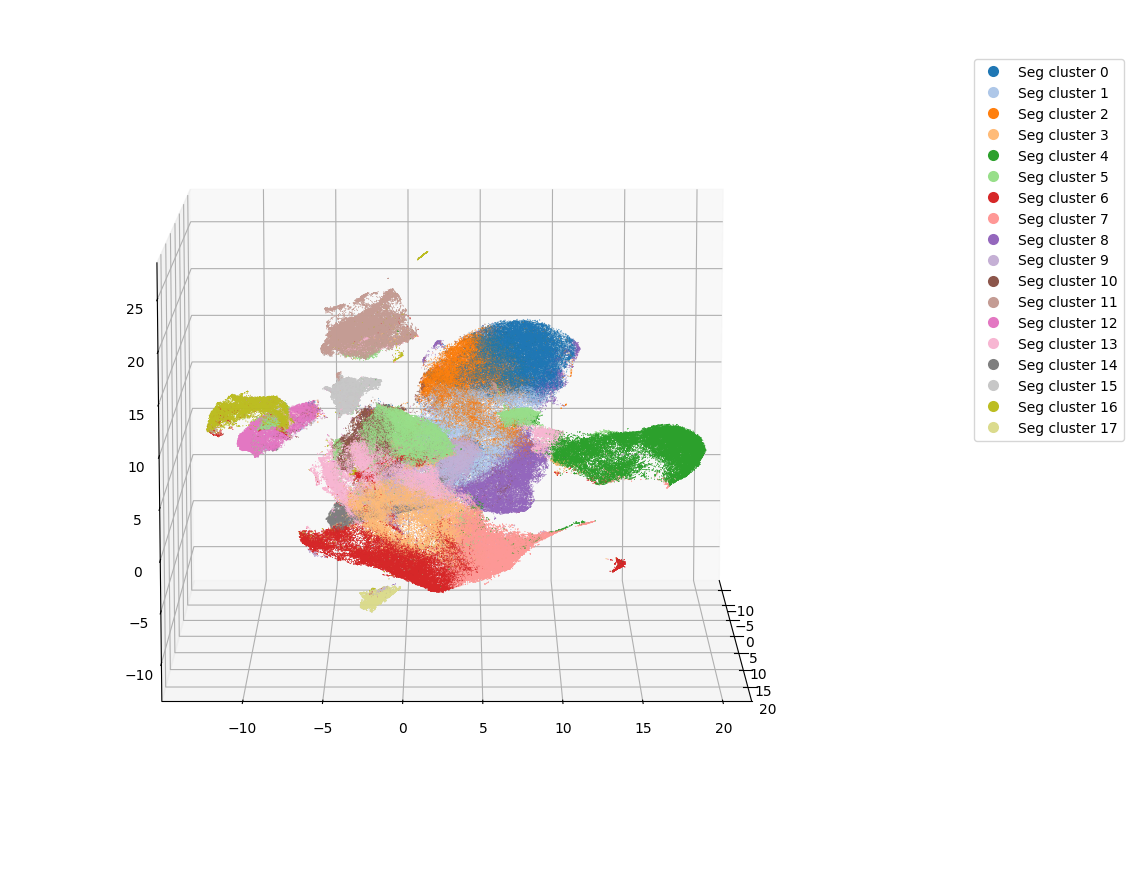

In [7]:
# generate and save animations
for clustering, data in data_dict.items():
    if not os.path.exists(os.path.join(out, f'{clustering}.mp4')):
        print(f'Saving rotating plot for {clustering} clustering...')
        rotation_movie(clustering=clustering, main_sample=data[0], cmap=data[1], c=data[2])
        print()
print('Complete!')